Car price prediction

# <span style="color: #000000;">Step 1|</span> <span style="color: orange; font-weight: bold;">Import Libraries</span>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# <span style="color: #000000;">Step 2:</span> <span style="color: orange; font-weight: bold;">Import Dataset</span>

In [ ]:
df = pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')

# <span style="color: #000000;">Step 3 |</span> <span style="color: orange; font-weight: bold;">Exploratory Data Analysis</span>

In [ ]:
print(" First few rows of the dataset:")
df.head()

 First few rows of the dataset:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.shape

(301, 9)

In [ ]:
# Check Missing Values
print('Missing Values:')
df.isnull().sum()

Missing Values:


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

-  So we have no null values ,we are ready to go.

In [ ]:
# Data types of columns
print(" Data types of columns:")
print(df.dtypes)

 Data types of columns:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [ ]:
# check for duplicate values
print('Duplicate Values:')
df.duplicated().sum()

Duplicate Values:


2

# <span style="color: #000000;">Step 4 |</span> <span style="color: orange; font-weight: bold;">Data visualization and EDA</span>

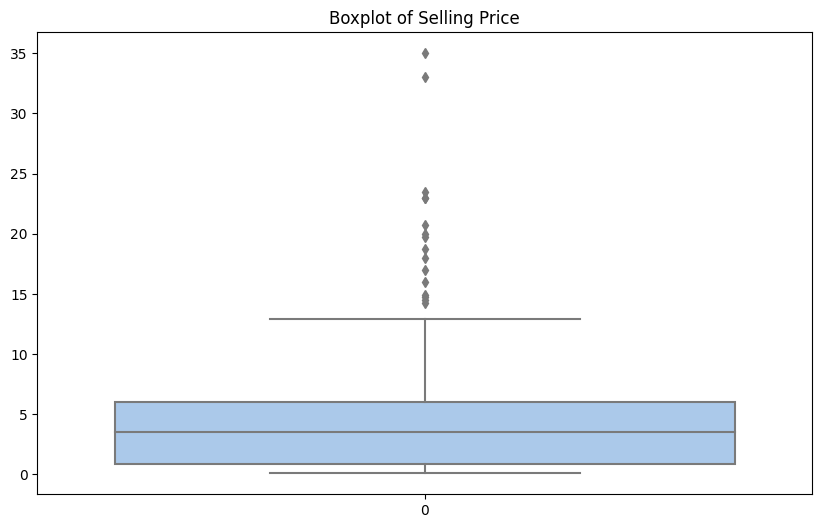

In [ ]:
# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(df['Selling_Price'],palette='pastel')
plt.title('Boxplot of Selling Price')
plt.show()


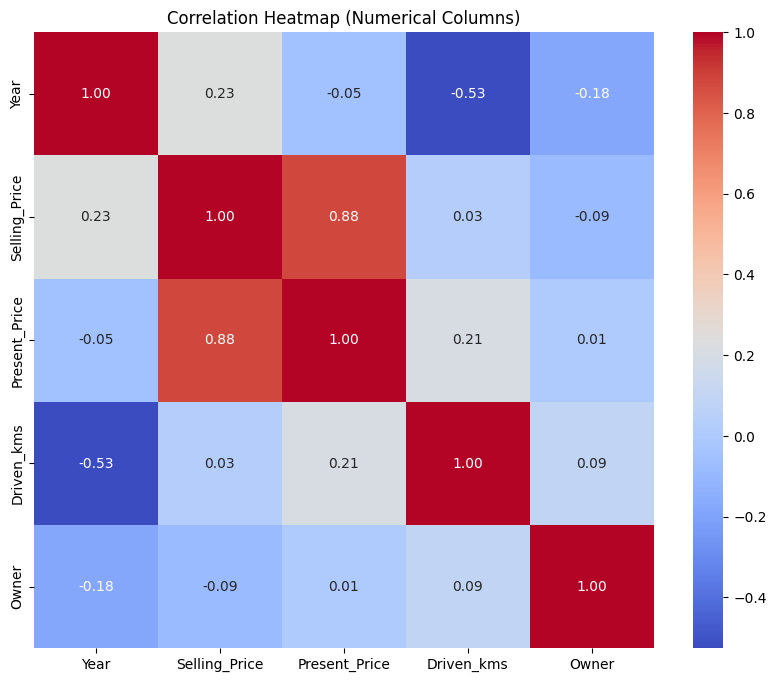

In [ ]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

### **Observation**
**Strong Positive Correlation:**
Selling Price and Present Price have a very strong positive correlation  indicating a nearly perfect linear relationship. This makes sense as present market value likely influences selling price.

**Year's Influence:** Year seems weakly negatively correlated with Selling Price, Present Price, and Driven_Kms. Newer cars (lower Year values) tend to have higher selling prices, lower present prices, and lower driven kilometers.

**Mileage Matters:** Driven_Kms shows a weak negative correlation with Selling Price and Present Price. Cars with lower mileage (lower Driven_Kms values) tend to sell for more.

-  The plot suggests a negative correlation between Driven_Kms and Selling_Price. Cars with higher driven kilometers tend to sell for less.

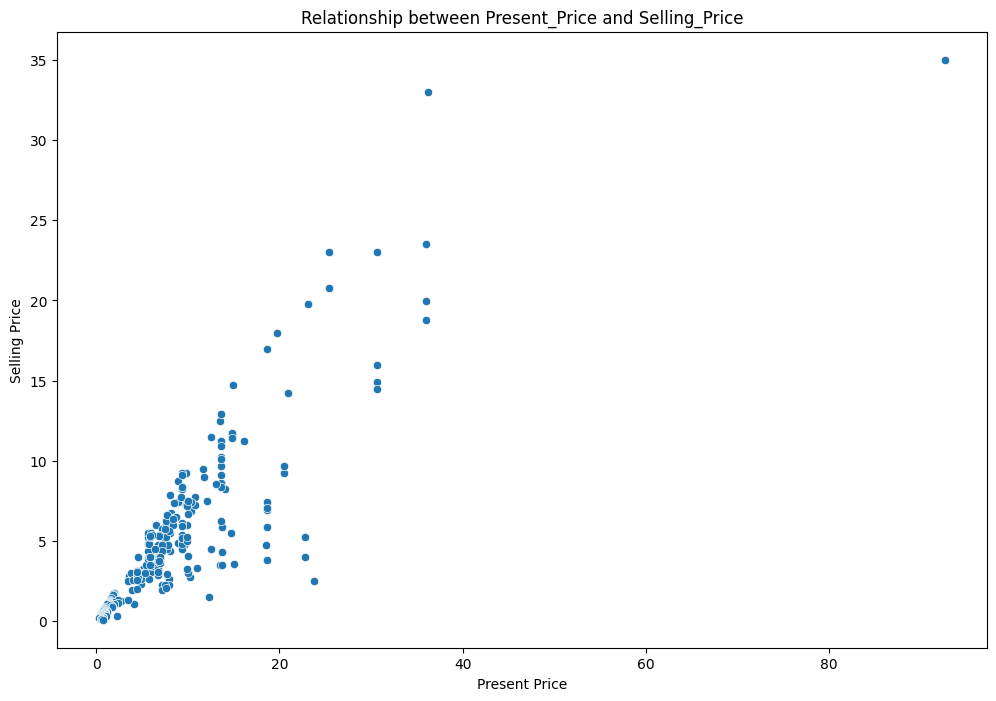

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present_Price and Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.show()

### **Observation**
**Price Match:** The plot reveals a strong positive correlation between Present Price and Selling Price. Cars with a higher present market value tend to sell for more.

**Market Influence:** This suggests the present market value heavily influences the final selling price.

In [ ]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


In [ ]:
print(df['Selling_type'].value_counts())

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64


In [ ]:
print(df['Transmission'].value_counts())

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [ ]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0



# <span style="color: #000000;">Step 5|</span> <span style="color: orange; font-weight: bold;"> Prediction</span>

In [ ]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [ ]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 6.675444100493416
R-squared: 0.7409934356413092


In [ ]:
# Make predictions
new_car = [[2022, 20000, 0, 1, 1, 0, 0]]  # Example new car data
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 8829.49338250246
